In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../utils')
print(sys.path)
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import StepLR
import gan_transformer as transformer
from load_dataset import *
import argparse
import os
import yaml
import matplotlib.pyplot as plt

['/home/shiqi/code/model_combination_Argos/gan_transformer', '/home/shiqi/anaconda3/envs/torch/lib/python39.zip', '/home/shiqi/anaconda3/envs/torch/lib/python3.9', '/home/shiqi/anaconda3/envs/torch/lib/python3.9/lib-dynload', '', '/home/shiqi/anaconda3/envs/torch/lib/python3.9/site-packages', '../utils', '../utils', '../utils']


In [27]:
nonlinear_data_dir = "../data_March"
linear_data_dir = "../data_linear_100"

In [28]:

u1_dataset_nonlin = []
u1_dataset_lin = []
err_dataset = []
x_dataset_nonlin = []
x_dataset_lin = []


for item in os.listdir(nonlinear_data_dir):
    nonlinear_data_file_path = os.path.join(nonlinear_data_dir, item)
    linear_data_file_path = os.path.join(linear_data_dir, item)

    # Check if the file exists before trying to load it
    if os.path.exists(nonlinear_data_file_path) and os.path.exists(linear_data_file_path):
        nonlinear_data_dict = np.load(nonlinear_data_file_path, allow_pickle=True).item()
        linear_data_dict = np.load(linear_data_file_path, allow_pickle=True).item()
        x_data_nonlin, y_data_nonlin, u1_data_nonlin, u2_data_nonlin = load_dataset(nonlinear_data_dict)
        x_data_lin, y_data_lin, u1_data_lin, u2_data_lin = load_dataset(linear_data_dict)
        x_dataset_nonlin.append(x_data_nonlin)
        x_dataset_lin.append(x_data_lin)
        u1_dataset_nonlin.append(u1_data_nonlin)
        u1_dataset_lin.append(u1_data_lin)
        err_dataset.append(x_data_nonlin - x_data_lin)
    else:
        print(f"File not found: {item}")

File not found: process_solution_data.py


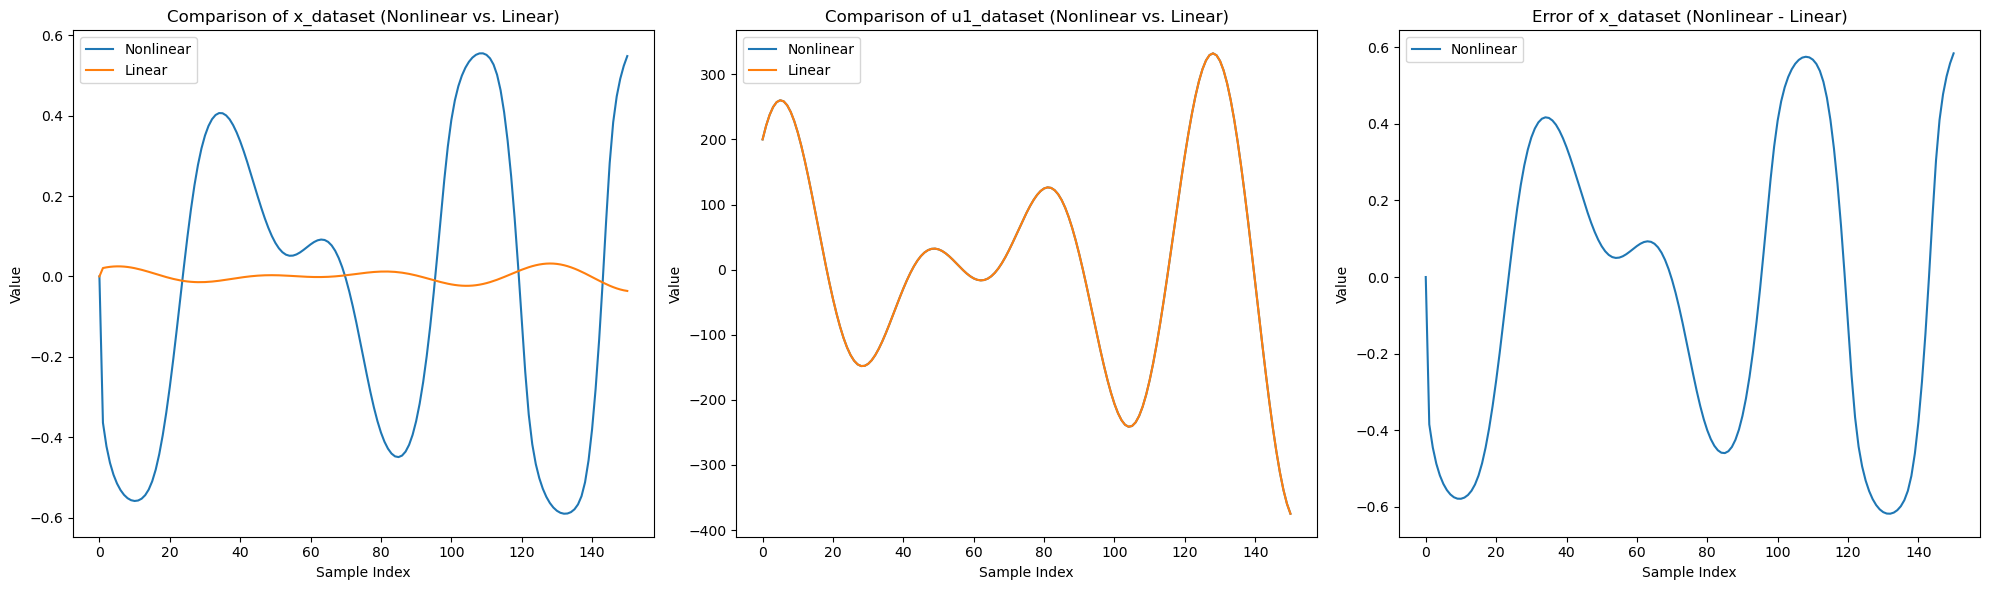

In [29]:
idx = 0

plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.plot(x_dataset_nonlin[idx][:, 5000], label='Nonlinear')
plt.plot(x_dataset_lin[idx][:, 5000], label='Linear')
plt.title('Comparison of x_dataset (Nonlinear vs. Linear)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(u1_dataset_nonlin[idx][:, 1], label='Nonlinear')
plt.plot(u1_dataset_lin[idx][:, 1], label='Linear')
plt.title('Comparison of u1_dataset (Nonlinear vs. Linear)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(err_dataset[idx][:, 5000], label='Nonlinear')
plt.title('Error of x_dataset (Nonlinear - Linear)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
x_dataset_nonlin[idx].shape

(151, 6957)

In [31]:
x_data_lin = np.concatenate(x_dataset_lin, axis = 0)
x_data_scaled = scaler_x.fit_transform(x_data_lin)
print(x_data_lin.shape)

(7248, 6957)


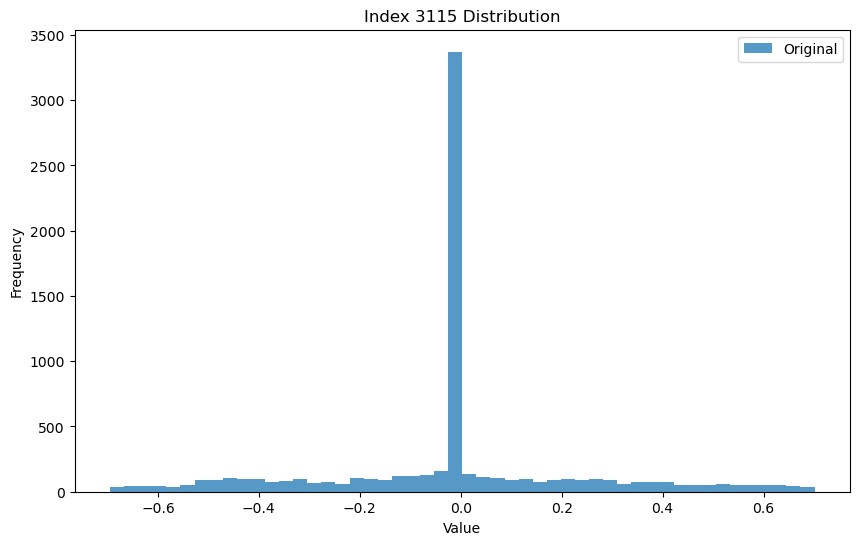

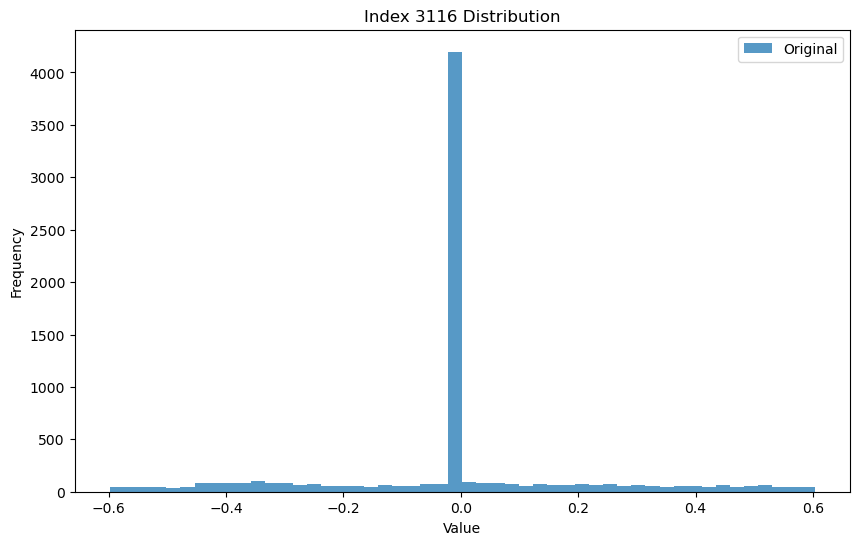

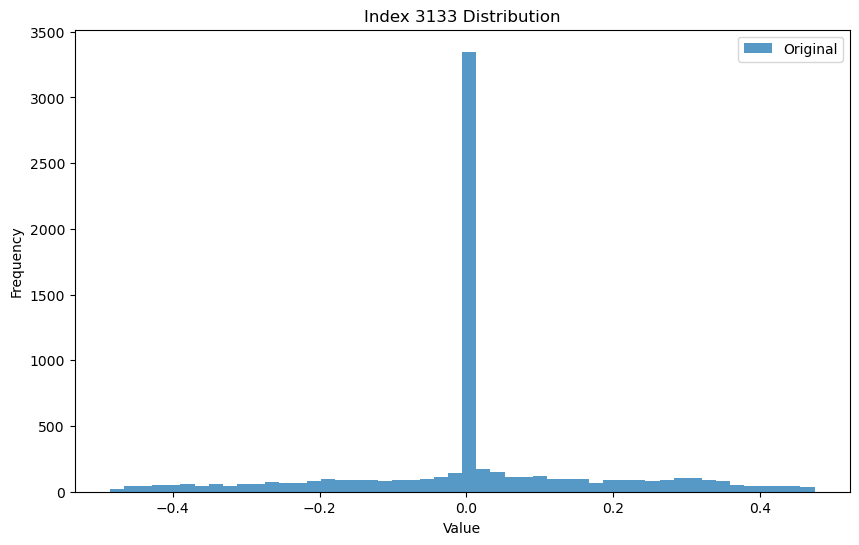

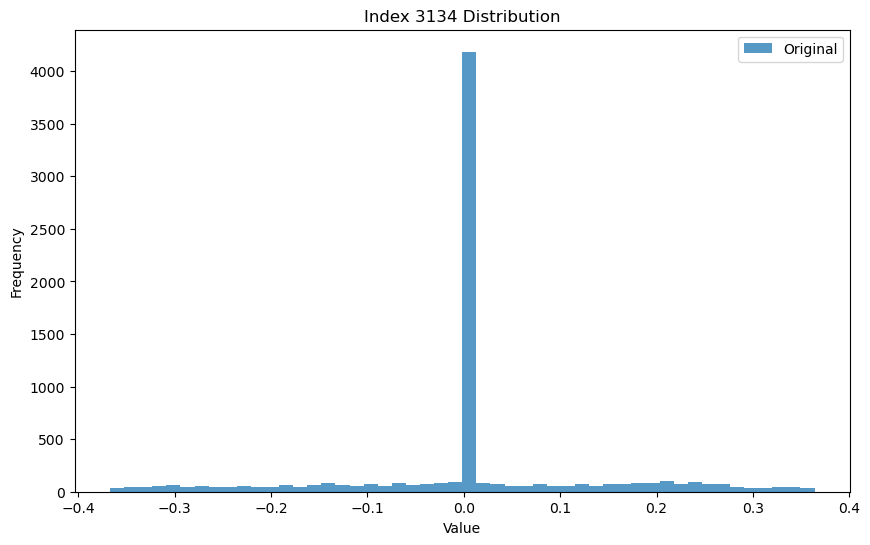

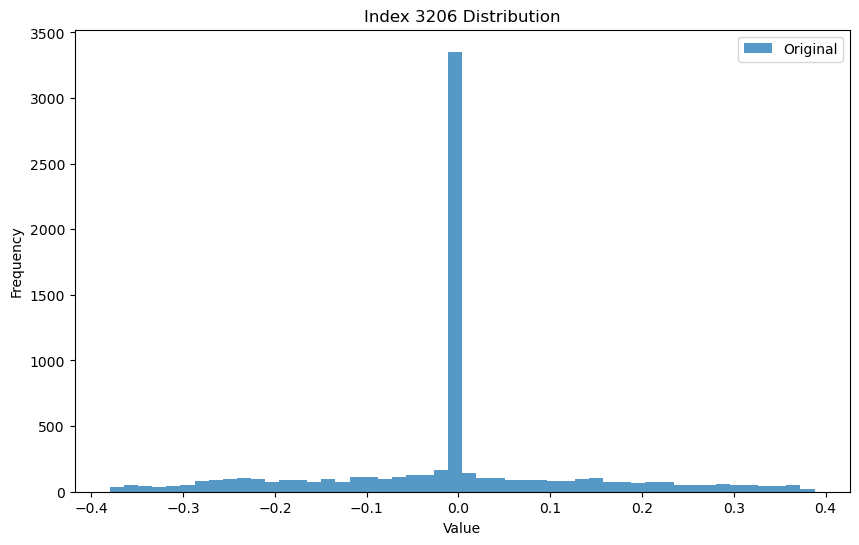

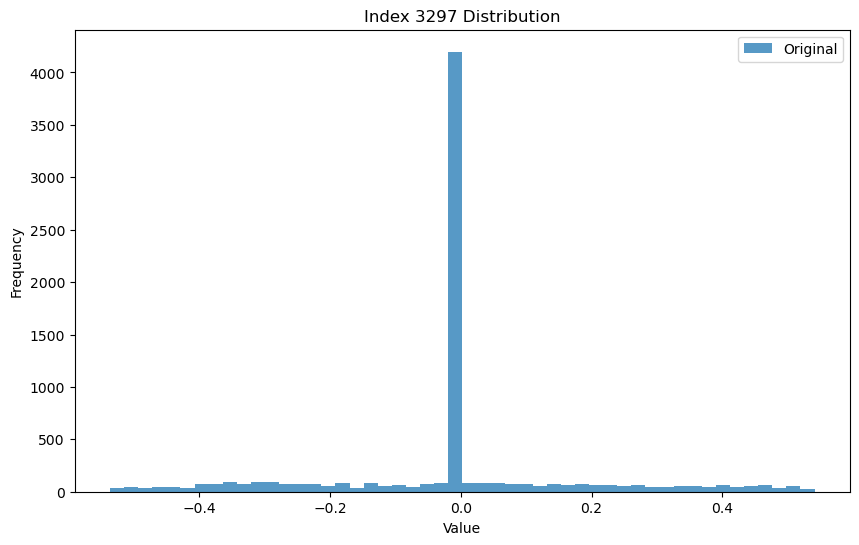

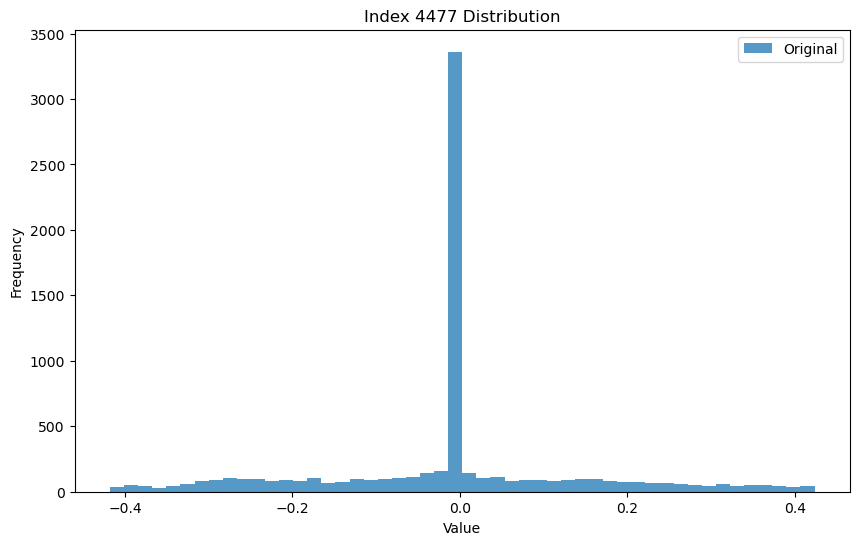

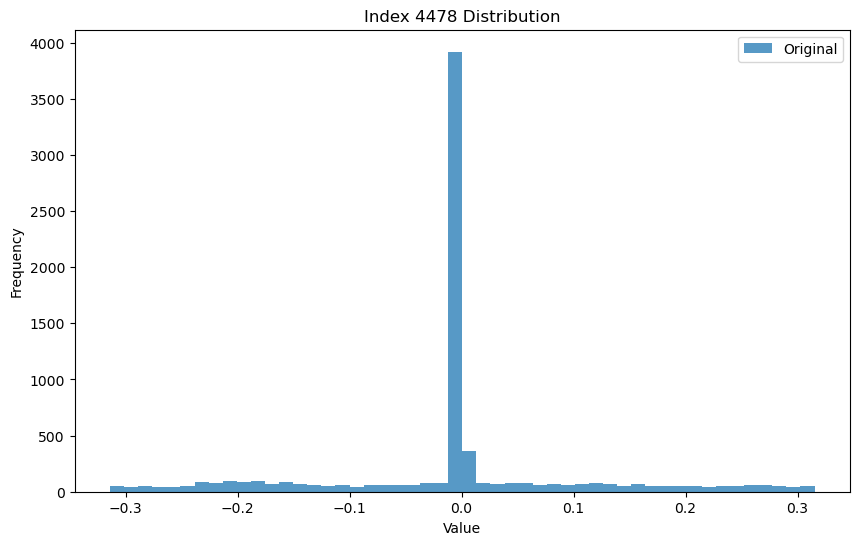

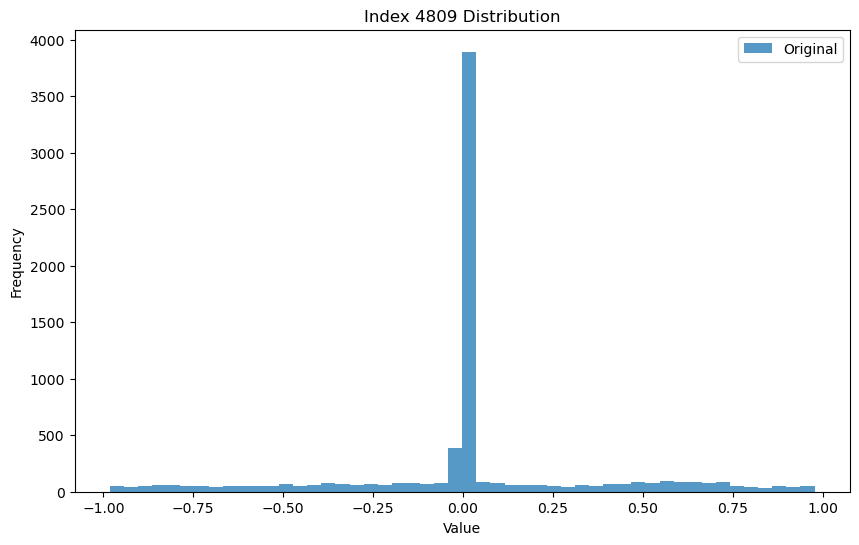

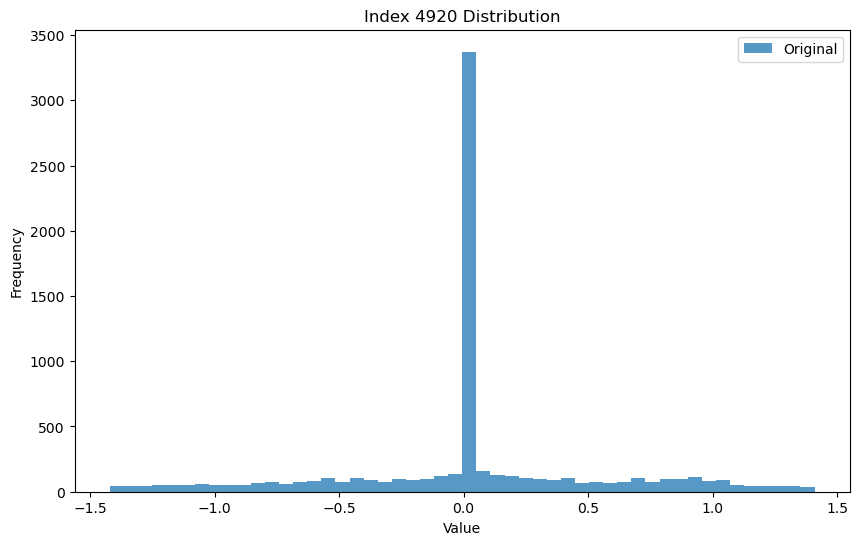

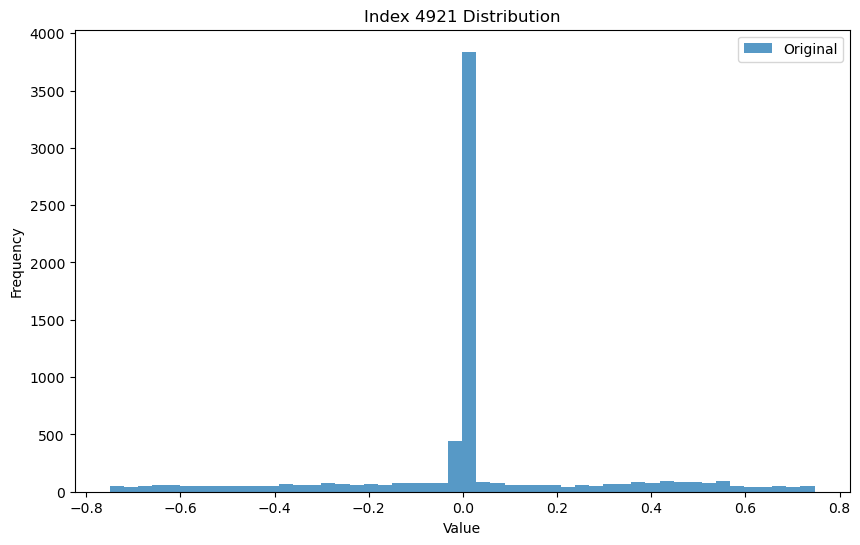

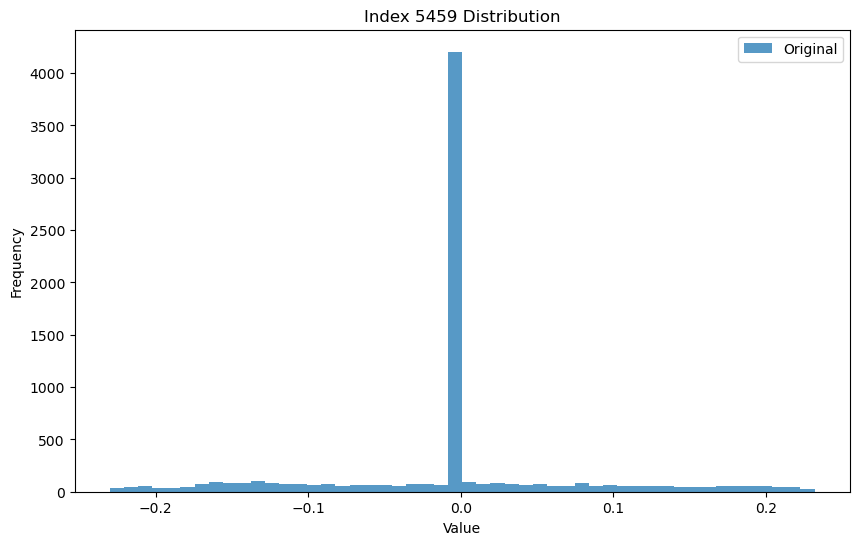

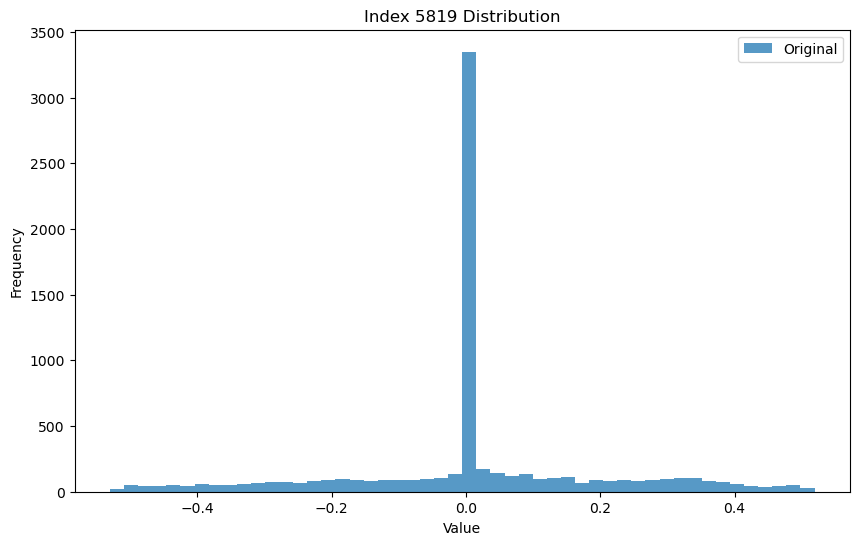

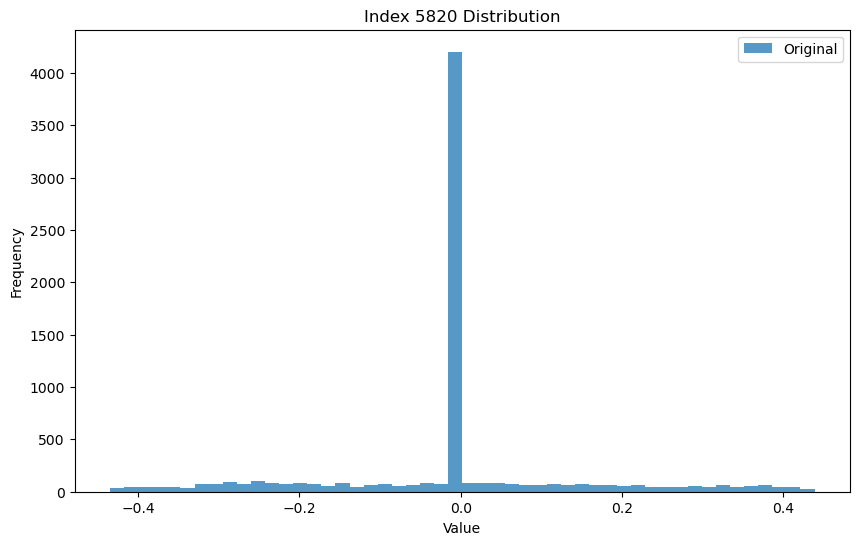

In [32]:
indexes_to_plot = [3115, 3116, 3133, 3134, 3206, 3297, 4477, 4478, 4809, 4920, 4921,
        5459, 5819, 5820]

indexes_random = np.random.choice(x_data_lin.shape[1], 10, replace=False)
for idx in indexes_to_plot:
    # 选取特定索引下的数据
    data = x_data_lin[:, idx]
#     data_scaled = x_data_scaled[:, idx]
    
    # 绘制直方图
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=50, alpha=0.75, label = 'Original')
#     plt.hist(data_scaled, bins=50, alpha=0.75, label = 'Scaled')

    plt.title(f'Index {idx} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    
    # 显示图表
    plt.show()

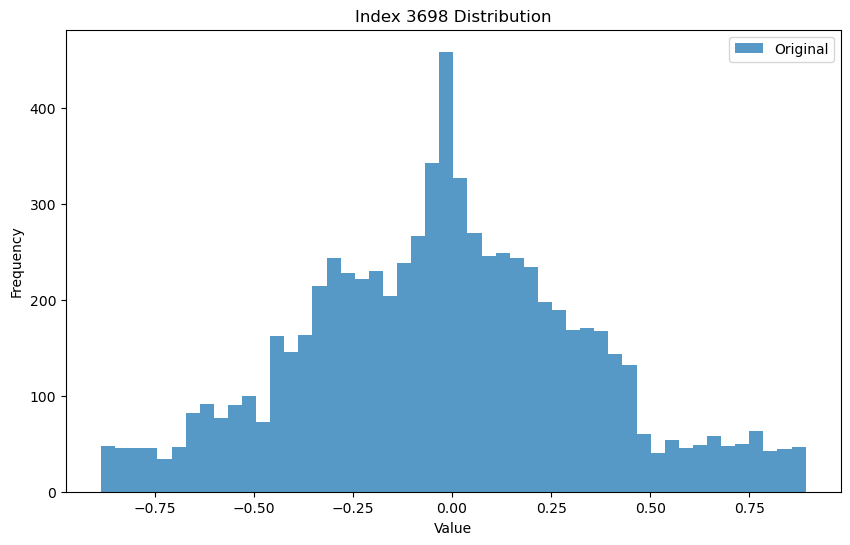

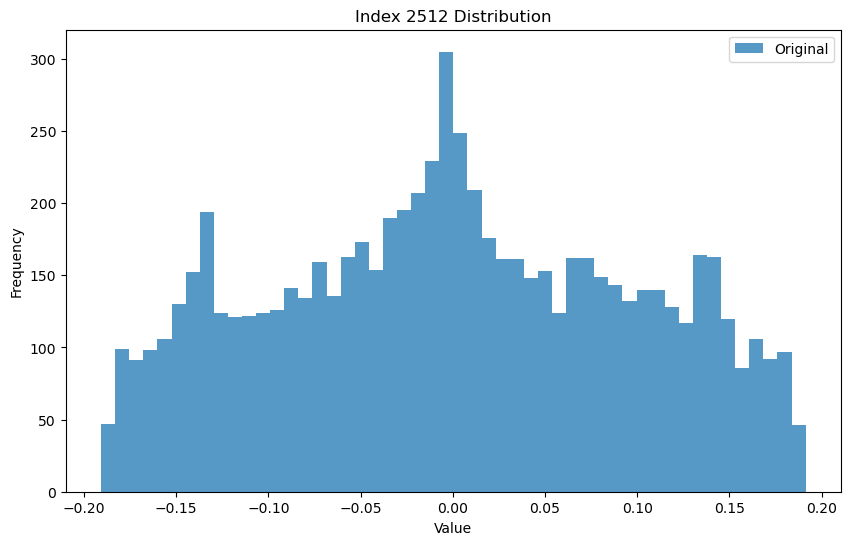

In [35]:
for idx in [3698, 2512]:
    # 选取特定索引下的数据
    data = x_data_lin[:, idx]
#     data_scaled = x_data_scaled[:, idx]
    
    # 绘制直方图
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=50, alpha=0.75, label = 'Original')
#     plt.hist(data_scaled, bins=50, alpha=0.75, label = 'Scaled')

    plt.title(f'Index {idx} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    
    # 显示图表
    plt.show()